In [1]:
# General Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn packages
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
train_df = pd.read_csv("./data/train_data_after_EDA.csv", index_col="Claim Identifier")

In [3]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,573740.0,42.119676,14.270117,-1.000000,31.000000,42.000000,54.000000,1.150000e+02
Alternative Dispute Resolution,573740.0,0.004547,0.067281,0.000000,0.000000,0.000000,0.000000,1.000000e+00
Attorney/Representative,573740.0,0.316697,0.465189,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Average Weekly Wage,545105.0,491.288339,6094.418361,0.000000,0.000000,0.000000,841.470000,2.828079e+06
Carrier Name,573740.0,0.045907,0.073106,0.000002,0.001804,0.009738,0.030570,1.936469e-01
Carrier Type,573740.0,0.926796,1.108136,0.000000,0.000000,1.000000,2.000000,7.000000e+00
Claim Injury Type,573740.0,1.903376,1.126561,0.000000,1.000000,1.000000,3.000000,7.000000e+00
County of Injury,573740.0,0.054921,0.036431,0.000234,0.020094,0.052269,0.092706,1.052724e-01
COVID-19 Indicator,573740.0,0.047957,0.213676,0.000000,0.000000,0.000000,0.000000,1.000000e+00
District Name,573740.0,0.275024,0.187830,0.006926,0.079445,0.150124,0.471747,4.717468e-01


In [4]:
X = train_df.drop(["Claim Injury Type"], axis = 1)
y = train_df["Claim Injury Type"]

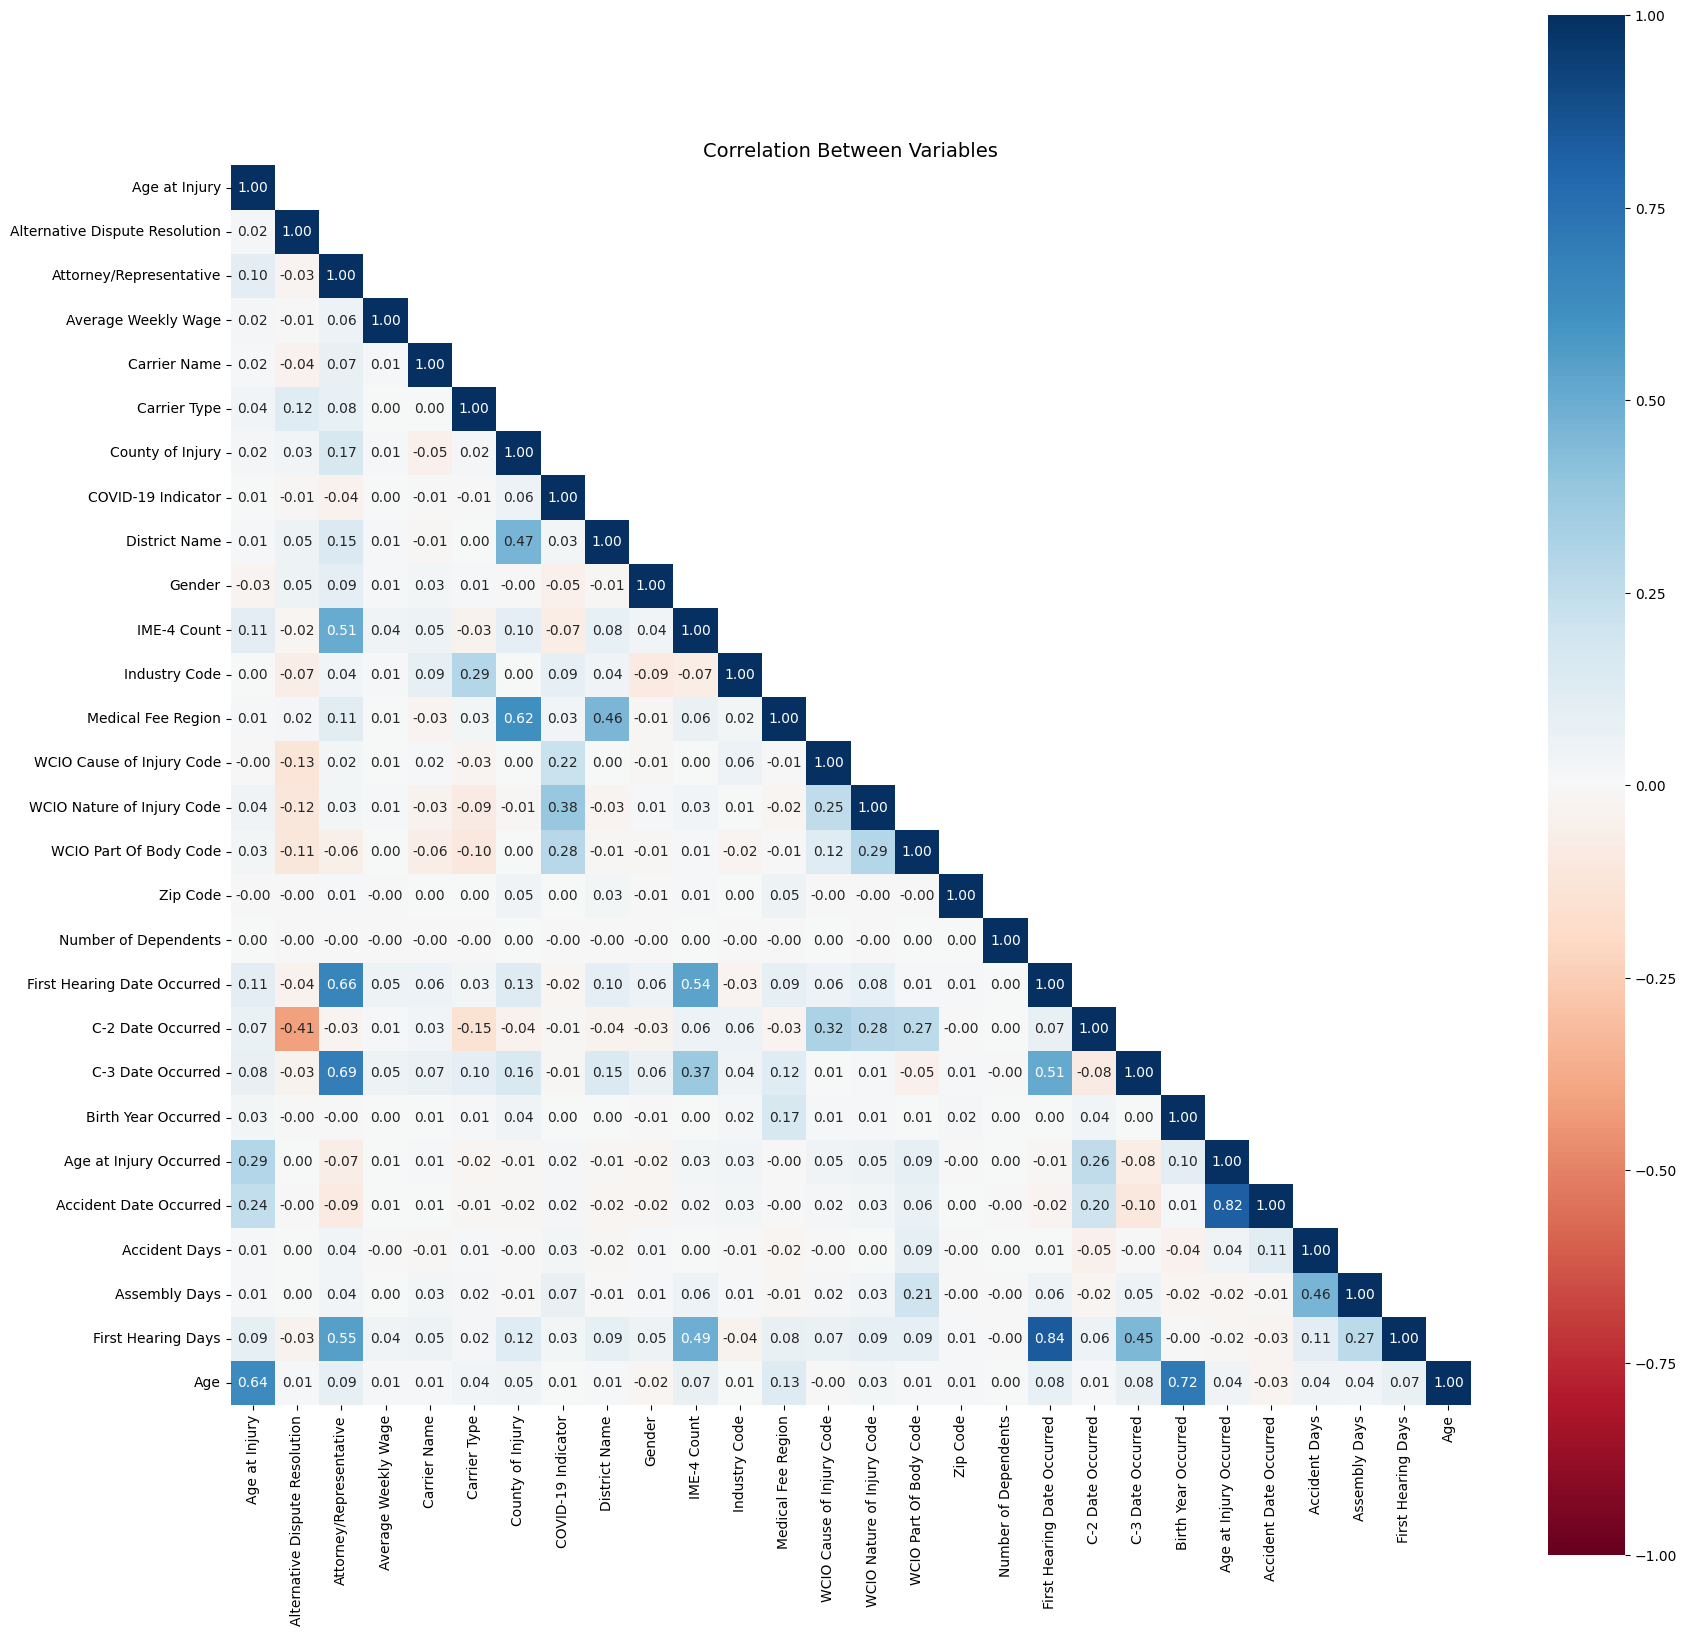

In [5]:
# initial correlation matrix with the respective values
corr_matrix = X.corr()

mask = np.tri(*corr_matrix.shape, k=0, dtype=bool)
# Keeps values where mask is True
corr_matrix = corr_matrix.where(mask)

# defines the figure size
fig, ax = plt.subplots(figsize=(20, 20))
# heatmap of the initial correlation matrix
l = sns.heatmap(corr_matrix, square=True, annot=True, fmt=".2f", vmax=1, vmin=-1, cmap='RdBu', ax=ax)
plt.title('Correlation Between Variables', size=14)
plt.show()

In [6]:
#X.drop(["Assembly Days","Age"],axis=1, inplace=True)

In [7]:
for col in X.columns:
    print(f'"{col}"')

"Age at Injury"
"Alternative Dispute Resolution"
"Attorney/Representative"
"Average Weekly Wage"
"Carrier Name"
"Carrier Type"
"County of Injury"
"COVID-19 Indicator"
"District Name"
"Gender"
"IME-4 Count"
"Industry Code"
"Medical Fee Region"
"WCIO Cause of Injury Code"
"WCIO Nature of Injury Code"
"WCIO Part Of Body Code"
"Zip Code"
"Number of Dependents"
"First Hearing Date Occurred"
"C-2 Date Occurred"
"C-3 Date Occurred"
"Birth Year Occurred"
"Age at Injury Occurred"
"Accident Date Occurred"
"Accident Days"
"Assembly Days"
"First Hearing Days"
"Age"


In [8]:
features = ["Average Weekly Wage","Industry Code"]

In [9]:
X.drop(features,axis=1, inplace=True)

In [10]:
#features_not_scale = ["Attorney/Representative", "COVID-19 Indicator", "Carrier Type", "C-2 Date Occurred", "C-3 Date Occurred",
#                            "First Hearing Date Occurred"]
features_not_scale=[]
features_scale=[]
for col in X.columns:
    if col not in features_not_scale:
        features_scale.append(col)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.25, random_state = 42, stratify = y, shuffle = True)

mm = MinMaxScaler()    
X_train[features_scale] = mm.fit_transform(X_train[features_scale])
X_val[features_scale] = mm.transform(X_val[features_scale])
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=None).fit(X_train, y_train)
#dt= KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
dt_train_pred = dt.predict(X_train)
dt_val_pred = dt.predict(X_val)

print("Classification Report for Training Data:")
print(classification_report(y_train, dt_train_pred))

# Generate the classification report for validation data
print("Classification Report for Validation Data:")
print(classification_report(y_val, dt_val_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.74      0.53      0.62      9352
           1       0.75      0.93      0.83    218165
           2       0.52      0.26      0.35     51645
           3       0.67      0.60      0.63    111354
           4       0.67      0.50      0.57     36206
           5       0.52      0.05      0.09      3158
           6       1.00      0.01      0.03        73
           7       0.64      0.17      0.27       352

    accuracy                           0.71    430305
   macro avg       0.69      0.38      0.42    430305
weighted avg       0.69      0.71      0.69    430305

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.64      0.45      0.53      3117
           1       0.71      0.88      0.78     72722
           2       0.23      0.11      0.15     17215
           3       0.53      0.48      0.50     

In [12]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
import time
time_start = time.time()
#print(time_start)
#for col in ["Average Weekly Wage","Industry Code"]:
#    knn_imputer = KNNImputer(n_neighbors=5)
#    X_train[[col]] = knn_imputer.fit_transform(X_train[[col]])
#    X_val[[col]] = knn_imputer.transform(X_val[[col]])
#print(time.time())

In [ ]:
#train_test_split de 10%

In [ ]:
from sklearn.model_selection import StratifiedKFold

n_folds = 5
K_fold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

ensemble = []
scaler_means = []
scaler_vars = []
   
for train_index, val_index in K_fold.split(x, y_encoded):
    
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    #fill NA
    
    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_val = scaler.transform(x_val)  
    
    scaler_means.append(scaler.mean_)
    scaler_vars.append(scaler.var_)

    model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=None).fit(X_train, y_train)
    model.fit(x_train, y_train)

    # Model that can find classes with very low data
    
    ensemble.append(model)
    
    y_val_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Fold validation accuracy: {accuracy:.4f}")


In [ ]:
# preprocess test data

In [ ]:
final_scaler_mean = np.mean(scaler_means, axis=0)
final_scaler_var = np.mean(scaler_vars, axis=0)

final_scaler = StandardScaler()
final_scaler.mean_ = final_scaler_mean
final_scaler.scale_ = np.sqrt(final_scaler_var)

test_df = final_scaler.transform(test_df)

pred_test_probs = np.zeros((test_df.shape[0], len(label_encoder.classes_)))  # criar um array para meter as probabilidades

for model in ensemble:
    pred_test_prob = model.predict_proba(test_df) 
    pred_test_probs += pred_test_prob / n_folds 

pred_test = np.argmax(pred_test_probs, axis=1)